In [1]:
#####################################################################################################
## This notebook contains 5 popular techniques for XML using the Titanic dataset

## Make sure to install the following before running the notebook:
### pip install LIME
### pip install shap
### pip install pdpbox
### pip install deeplift
#####################################################################################################

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

#### preprocessing both train and test data

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
med1 = train.Age.median()
med2 = test.Age.median()

In [9]:
train['Age'] = train['Age'].map(lambda x: med1 if np.isnan(x) else x)
test['Age'] = test['Age'].map(lambda x: med2 if np.isnan(x) else x)

In [10]:
mode = train.Embarked.value_counts()[0]

In [11]:
train['Embarked'] = train['Embarked'].map(lambda x: mode if pd.isnull(x) else x)

In [12]:
train = train.dropna()
test = test.dropna()

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [14]:
train = train.join(pd.get_dummies(train['Sex'], prefix='Sex'))
train = train.join(pd.get_dummies(train['Pclass'], prefix='Pclass'))
train = train.join(pd.get_dummies(train['Embarked'], prefix='Embarked'))
train = train.join(pd.get_dummies(train['SibSp'], prefix='SibSp'))
train = train.join(pd.get_dummies(train['Parch'], prefix='Parch'))

In [15]:
rem = ['PassengerId','Name','Ticket','Cabin','Pclass','Sex','Embarked','SibSp','Parch']

for i in train.columns:
    if i in rem:
        train = train.drop(i, axis=1)

In [16]:
train.head()

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_644,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch_0,Parch_1,Parch_2,Parch_4
1,1,38.0,71.2833,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,1,35.0,53.1000,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
6,0,54.0,51.8625,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
10,1,4.0,16.7000,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
11,1,58.0,26.5500,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [18]:
test = test.join(pd.get_dummies(test['Sex'], prefix='Sex'))
test = test.join(pd.get_dummies(test['Pclass'], prefix='Pclass'))
test = test.join(pd.get_dummies(test['Embarked'], prefix='Embarked'))
test = test.join(pd.get_dummies(test['SibSp'], prefix='SibSp'))
test = test.join(pd.get_dummies(test['Parch'], prefix='Parch'))

In [19]:
rem = ['PassengerId','Name','Ticket','Cabin','Pclass','Sex','Embarked','SibSp','Parch']

for i in test.columns:
    if i in rem:
        test = test.drop(i, axis=1)

#### end of preprocessing
#### split the target from the features of training data

In [21]:
xtrain = train.drop('Survived',axis=1)
ytrain = train['Survived']
xtest = test

In [22]:
######################################################

#### 1) FEATURE IMPORTANCE
#### Random Forest Classifier - to classify whether Survived or not 

In [23]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(xtrain, ytrain)

In [24]:
## Group all model features and obtain their importance
## In this case, the Gini importance is used
## Gini importance = total decrease in node impurity averaged over all the trees in the ensemble 

feats = {}

for x,y in zip(xtrain.columns, rfc.feature_importances_):
    feats[x] = y

In [27]:
## sort features based on Gini importance in descending order

imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importance'})
imp_sort = imp.sort_values(by = 'Gini-importance', ascending=False)
imp_sort

,Gini-importance
Fare,0.282024
Age,0.274076
Sex_female,0.143587
Sex_male,0.136695
SibSp_1,0.021457
Embarked_S,0.017637
Parch_0,0.017435
SibSp_0,0.017233
Embarked_C,0.016607
Parch_2,0.016407


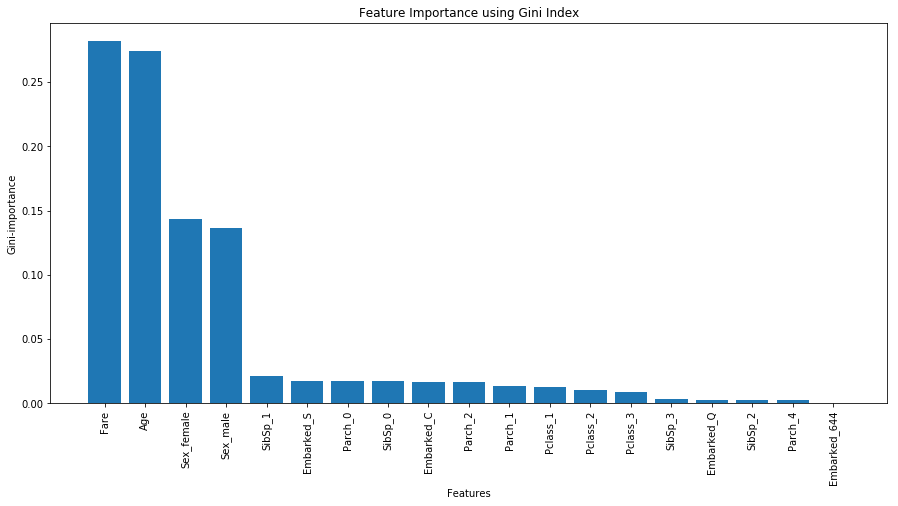

In [30]:
## plot features and their Gini importance

x = imp_sort.index
y = []
for i in range(0,len(imp_sort)):
    y.append(imp_sort['Gini-importance'][i])

plt.figure(figsize=(15,7))
bar_plot = plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Feature Importance using Gini Index')
plt.xlabel('Features')
plt.ylabel('Gini-importance')
plt.show()

In [31]:
#########################################################################

#### 2) LIME - Local Interpretable Model-Agnostic Explanations

In [75]:
import lime
import lime.lime_tabular

In [76]:
## Extract all the features from your data and place them in different lists based on their type 
fl = []
inf = []

for i in xtrain.columns:
    if xtrain[i].dtype=='float64':
        fl.append(i)
    elif xtrain[i].dtype=='uint8':
        inf.append(i)
        
train_fl = xtrain[fl]
train_int = xtrain[inf]

In [77]:
## concatenate the lists
feats = list(train_fl) + list(train_int)

In [78]:
predict_fn_rf = lambda x: rfc.predict_proba(x).astype(float)

In [79]:
explainer = lime.lime_tabular.LimeTabularExplainer(xtrain[feats].astype(int).values, 
                                                   mode='classification',
                                                   training_labels=train['Survived'],
                                                   feature_names=feats)

Data with input dtype int32 was converted to float64 by StandardScaler.


In [80]:
## explanation for index 0 whose output is class 1
exp = explainer.explain_instance(xtest.iloc[0], predict_fn_rf, num_features=19)
exp.show_in_notebook(show_all=False)

#### Sex_female is assigned an importance of 0.27 and the colour indicates if its contributing to 0 (blue) or 1 (orange)
#### indicates if this feature’s value satisfies this criteria, it supports class 1

In [81]:
## explanation for index 5 whose output is class 0
exp = explainer.explain_instance(xtest.iloc[5], predict_fn_rf, num_features=19)
exp.show_in_notebook(show_all=False)

#### Sex_female<=0 indicates if this feature’s value satisfies this criteria, it supports class 0

In [61]:
###############################################################################

#### 3) SHAP - SHapley Additive exPlanations
#### XGBoost Classifier --> SHAP is optimized for this

In [82]:
import shap
from xgboost import XGBClassifier

In [83]:
xtrain.columns

Index(['Age', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_644', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_4'],
      dtype='object')

In [84]:
xgb = XGBClassifier().fit(xtrain, ytrain)

In [85]:
## load JS visalization for SHAP plots
shap.initjs()

In [86]:
## create SHAP Explainer
## The TreeExplainer from the SHAP library is optimized to trace through the XGBoost tree to 
## find the Shapley value estimates of the features

explainer = shap.TreeExplainer(xgb)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [87]:
## obtain the Shapley values
shap_values = explainer.shap_values(xtest)

In [88]:
## SHAP plot for xtest[0] where output is '1'
shap.force_plot(explainer.expected_value, 
                shap_values[0], 
                features=xtest.iloc[[0]], 
                feature_names=xtest.columns, 
                link='logit')

#### Base value: average of all predictions
#### Each arrow is a Shapley value that pushes to increase (red) or decrease (blue) the prediction
#### Person 1 has high predicted survival probability of 1
#### Factors like Age and Sex_female increases the person’s predicted survival probability

In [89]:
## SHAP plot for xtest[5] where output is '0'
shap.force_plot(explainer.expected_value, 
                shap_values[5], 
                features=xtest.iloc[[5]], 
                feature_names=xtest.columns, 
                link='logit')

#### Person 2 has low predicted survival probability of 0.20
#### Factors likeFare, while it tends to increase the loan acceptance, is offset by decreasing effects like Sex_female, Age, etc. 

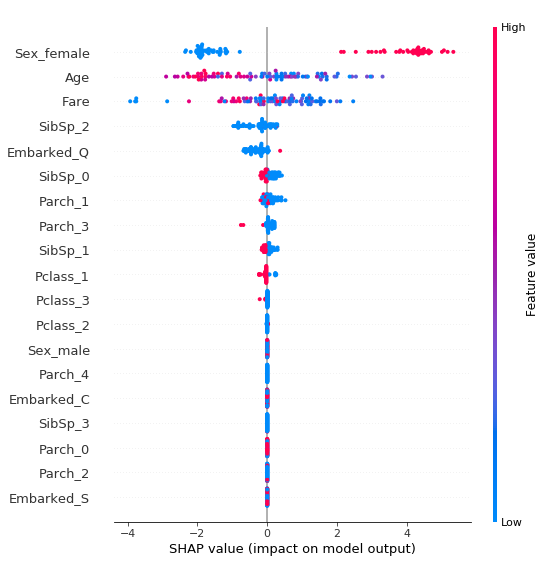

In [90]:
# global view
shap.summary_plot(shap_values, feature_names=xtest.columns, features=xtest)

#### Each point is a Shapley value for that instance 
#### Colour represents value of that feature
#### Features are ordered according to their importance 
#### X-axis = Shapley values
#### Y-axis = features

#### High values of Sex_female have a positive contribution to the prediction, while it’s the opposite for Age, where high values have a negative contribution to the predictions

In [91]:
#######################################################################

#### 4) Partial Dependence Plots 

In [92]:
from pdpbox import pdp

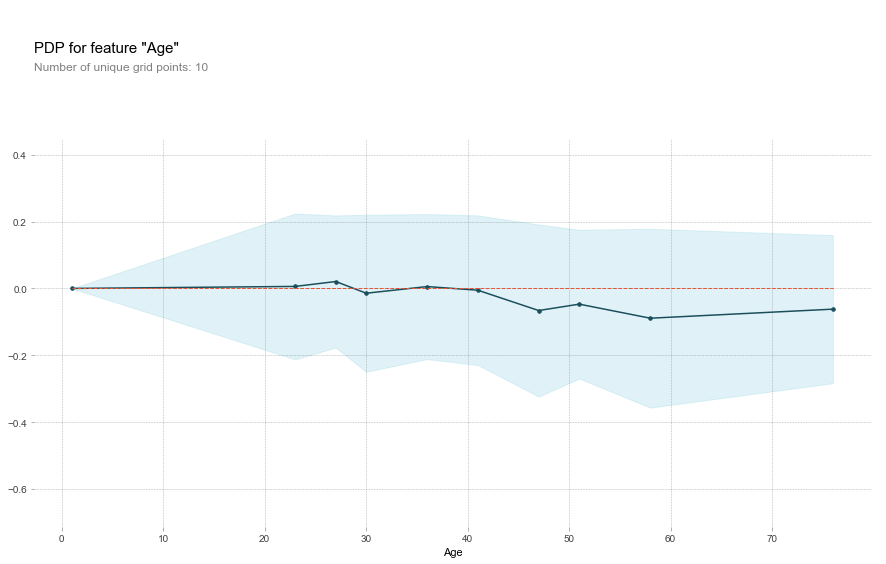

In [96]:
## PDP for single feature - enter desired feature
## pdp_plot plots the feature impact

ff = 'Age'
pdp_feat = pdp.pdp_isolate(model=rfc, dataset=test, model_features=xtest.columns,feature=ff)
fig, axes = pdp.pdp_plot(pdp_feat,ff)

#### Blue shaded area indicates the level of confidence
#### We can observe that having  Age above 30-40 decreases your chances of survival
#### The model thinks you’re more likely to survive if your Age is <30

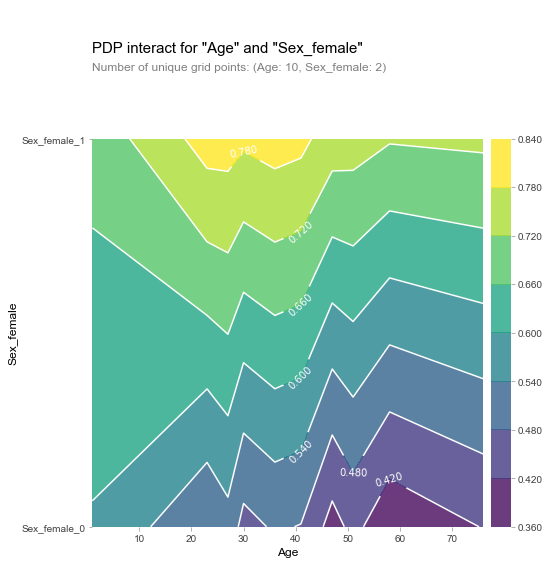

In [99]:
## Interaction between two features
## PDP for feature combination -- enter two features
## pdp_interact_plot plots the feature interaction 
## changing x_quantile and plot_pdp between True and False gives you two types of plots but with the same depiction

f1 = 'Age'
f2 = 'Sex_female'

inter = pdp.pdp_interact(model = rfc, dataset=test, model_features=xtest.columns, features=[f1,f2])
fig, axes = pdp.pdp_interact_plot(pdp_interact_out=inter,feature_names=[f1,f2] ,plot_type='contour',
                                 x_quantile=False, plot_pdp=False)

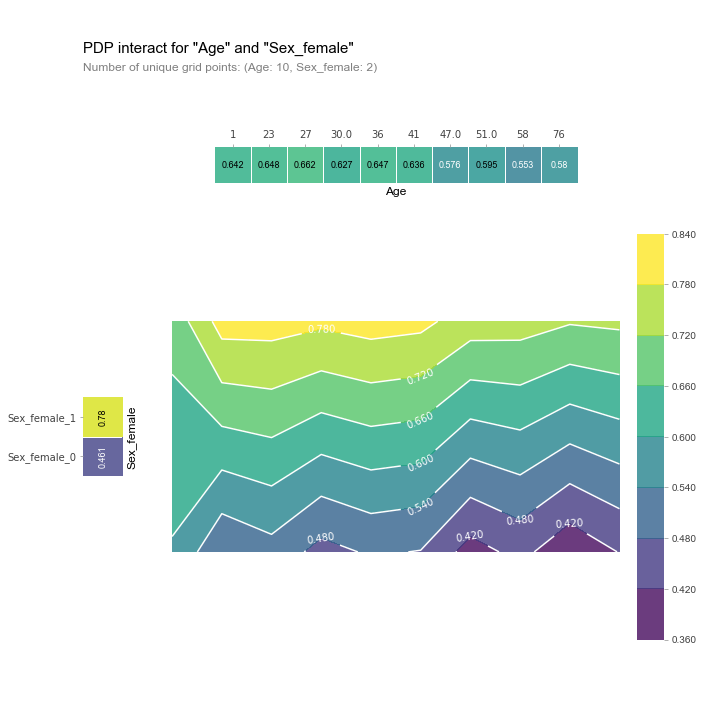

In [101]:
## give last two (x_quantile and plot_pdp) as True for different type of contour plot
f1 = 'Age'
f2 = 'Sex_female'
inter1 = pdp.pdp_interact(model=rfc, dataset=test, model_features=xtest.columns, features=[f1, f2])
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=[f1, f2], plot_type='contour', x_quantile=True, plot_pdp=True)

#### High probability of survival when Sex_female is 1 and Age between < 40
#### for Age > ~45, survival is nearly independent of Sex_female, whereas for lower Ages, there is a strong dependence on Gender

In [102]:
#########################################################################

#### 5) DeepLIFT - Deep Learning Important Features
#### Keras NN for classification

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.models import model_from_json

Using TensorFlow backend.


In [104]:
model = Sequential()

model.add(Dense(200, activation='relu', input_dim=19))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))

model.add(Dense(1,activation='softmax'))

In [105]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
204/204 [==============================] - ETA: 2s - loss: 4.9820 - acc: 0.687 - 1s 3ms/step - loss: 5.3141 - acc: 0.6667
Epoch 2/20
204/204 [==============================] - ETA: 0s - loss: 6.4766 - acc: 0.593 - 0s 152us/step - loss: 5.3141 - acc: 0.6667
Epoch 3/20
204/204 [==============================] - ETA: 0s - loss: 5.4802 - acc: 0.656 - 0s 152us/step - loss: 5.3141 - acc: 0.6667
Epoch 4/20
204/204 [==============================] - ETA: 0s - loss: 7.9712 - acc: 0.500 - 0s 147us/step - loss: 5.3141 - acc: 0.6667
Epoch 5/20
204/204 [==============================] - ETA: 0s - loss: 4.4838 - acc: 0.718 - 0s 112us/step - loss: 5.3141 - acc: 0.6667
Epoch 6/20
204/204 [==============================] - ETA: 0s - loss: 5.9784 - acc: 0.625 - 0s 112us/step - loss: 5.3141 - acc: 0.6667
Epoch 7/20
204/204 [==============================] - ETA: 0s - loss: 3.9856 - acc: 0.750 - 0s 112us/step - loss: 5.3141 - acc: 0.6667
Epoch 8/20
204/204 [==============================] - ETA

In [107]:
## save model to json file
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [108]:
## save model weights to HDF5
model.save_weights('model.h5')

In [109]:
keras_json = 'model.json'
keras_weights = 'model.h5'

In [110]:
km = model_from_json(open(keras_json).read())

In [111]:
km.load_weights(keras_weights)

In [112]:
import deeplift
from deeplift.layers import NonlinearMxtsMode
import deeplift.conversion.kerasapi_conversion as kc

In [113]:
## convert Keras Sequential model to DeepLIFT model
deepmodel = kc.convert_model_from_saved_files(
                    json_file = keras_json, 
                    h5_file = keras_weights, 
                    nonlinear_mxts_mode=deeplift.layers.NonlinearMxtsMode.GuidedBackprop)

nonlinear_mxts_mode is set to: GuidedBackprop
Heads-up: I assume softmax is the output layer, not an intermediate one; if it's an intermediate layer, please let me know and I will prioritise that use-case


In [114]:
deepmodel.get_layers()

[<deeplift.layers.core.Input at 0x1d61ad34160>,
 <deeplift.layers.core.Dense at 0x1d61ad345c0>,
 <deeplift.layers.activations.ReLU at 0x1d61ad344e0>,
 <deeplift.layers.core.Dense at 0x1d61ad34400>,
 <deeplift.layers.activations.ReLU at 0x1d61ad34320>,
 <deeplift.layers.core.Dense at 0x1d61ad343c8>,
 <deeplift.layers.activations.ReLU at 0x1d61ad342b0>,
 <deeplift.layers.core.Dense at 0x1d61ad34588>,
 <deeplift.layers.activations.Softmax at 0x1d61ad34470>]

In [115]:
## Specify the index of the layer to compute the importance scores of.
## In the example below, we find scores for the input layer, which is idx 0 in deeplift_model.get_layers()
find_scores_layer_idx = 0

In [116]:
## Compile the function that computes the contribution scores
## target_layer_idx= -1 (regression), -2 (sigmoid/softmax outputs)
deeplift_contribs_func = deepmodel.get_target_contribs_func(
                            find_scores_layer_idx=find_scores_layer_idx,
                            target_layer_idx=-2)

TARGET LAYER SET TO preact_3


In [117]:
## choose the input row whose Contribution Score is to be observed
idx = 0

In [118]:
## obtain the scores
scores = np.array(deeplift_contribs_func(task_idx=0,
                                         input_data_list=[xtest.iloc[[0]]],
                                         batch_size=10,
                                         progress_update=1000))

No reference provided - using zeros
Done 0


In [119]:
scores

array([[ 1.4545697 , 23.505255  , -0.08150228,  0.        , -0.0578496 ,
        -0.        ,  0.        , -0.        ,  0.        ,  0.05193515,
        -0.        , -0.03664509,  0.        , -0.        , -0.03195405,
        -0.        , -0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [120]:
## flatten the list
flat_scores = [item for sublist in scores for item in sublist]

In [121]:
## Group all model features with their importance
feats = {}

for x,y in zip(xtest.columns, flat_scores):
    feats[x] = y

In [123]:
imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Contribution Score'})
imp

## can sort it as well:
#imp_sort = imp.sort_values(by = 'Contribution Score', ascending=False)
#imp_sort

,Contribution Score
Age,1.454570
Fare,23.505255
Sex_female,-0.081502
Sex_male,0.000000
Pclass_1,-0.057850
Pclass_2,-0.000000
Pclass_3,0.000000
Embarked_C,-0.000000
Embarked_Q,0.000000
Embarked_S,0.051935


#### Negative/Positive contribution score means that the input contributed to moving the output below/above its reference value
#### Reference value: by how much the output changes based on changes in input. Here it is 0 (which is the usual scenario unless specified otherwise)
#### positive scores push the probability higher and negative scores push it lower (Similar to Shapley values)
#### Scores closer to zero are considered “unimportant” by DeepLIFT, i.e., those features that DeepLIFT thinks wouldn’t affect the output much

#### DeepLIFT decomposes the prediction on a specific input by backpropagating the contributions of all neurons in the network to every feature of the input

### end of the notebook.